# Generate data from HMM model
This is a copy of the notebook that generates data from GaussianHMM model, but model class is replaced with GMMHMM.

In [19]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import pickle
from time import time
import os
import utils

DATA_DIR = "./generated_data_set2"
GENERATING_MODEL_NAME = "HMM_GMM"
N_TRAIN_SAMPLES_PER_MODEL = 5
N_TEST_SAMPLES_PER_MODEL = 100
MIN_SAMPLE_LEN = 50
MAX_SAMPLE_LEN = 150

FILENAME_SUFFIX = f"{GENERATING_MODEL_NAME}_data_ntrain{N_TRAIN_SAMPLES_PER_MODEL}_min{MIN_SAMPLE_LEN}_max{MAX_SAMPLE_LEN}"
DESCRIPTION = ""

time_index = int(time())

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Define models

In [20]:
def define_HMM(n_mix: int, weights_: np.ndarray, n_components: int, covariance_type: str, means_: np.ndarray, 
               covars_: np.ndarray, startprob_: np.ndarray, transmat_: np.ndarray) -> hmm.GMMHMM:
    """Create an instance of hmm.GMMHMM and set all variables necessary to generate data."""
    # if sum(startprob_) != 1:
    #     print(f"{startprob_ = }")
    #     raise ValueError(f"Sum of startprob_ (= {sum(startprob_)}) must be 1.")
    # for i, row in enumerate(transmat_):
    #     if sum(row) != 1:
    #         print(f"{row = }")
    #         raise ValueError(f"Sum of row {i} of transition matrix (= {sum(row)}) must be 1.")

    model = hmm.GMMHMM(n_mix = n_mix, n_components= n_components, covariance_type= covariance_type) 
    model.means_ = means_
    model.weights_ = weights_
    model.covars_ = covars_
    model.startprob_ = startprob_
    model.transmat_ = transmat_
    return model

In [21]:
model1 = define_HMM(
    n_mix = 2, n_components = 2, covariance_type = "diag", 
    weights_= np.array([[0.5, 0.5],[0.5, 0.5]]), # n_comp, n_mix
    means_ = np.array([[[0.5],[0.5]], [[100],[50]]]),   # n_comp, n_mix, n_features
    covars_ = np.array([[[0.001],[0.2]], [[10],[10]]]), # n_comp, n_mix, n_features
    startprob_ = np.array([0.8, 0.2]), 
    transmat_ = np.array([[0.9, 0.1],
                          [0.5, 0.5]])
)

model2 = define_HMM(
    n_mix = 2, n_components = 2, covariance_type = "diag", 
    weights_= np.array([[0.5, 0.5],[0.5, 0.5]]), # n_comp, n_mix
    means_ = np.array([[[0.7],[0.7]], [[90],[60]]]),   # n_comp, n_mix, n_features
    covars_ = np.array([[[0.001],[0.2]], [[20],[10]]]), # n_comp, n_mix, n_features
    startprob_ = np.array([0.7, 0.3]), 
    transmat_ = np.array([[0.9, 0.1],
                          [0.5, 0.5]])
)

model3 = define_HMM(
    n_mix = 2, n_components = 2, covariance_type = "diag", 
    weights_= np.array([[0.9, 0.1],[0.9, 0.1]]), # n_comp, n_mix
    means_ = np.array([[[0.7],[0.7]], [[90],[60]]]),   # n_comp, n_mix, n_features
    covars_ = np.array([[[0.001],[0.5]], [[0.001],[2]]]), # n_comp, n_mix, n_features
    startprob_ = np.array([0.7, 0.3]), 
    transmat_ = np.array([[0.8, 0.2],
                          [0.5, 0.5]])
)

model4 = define_HMM(
    n_mix = 1, n_components= 1, covariance_type= "diag",
    weights_ = np.array([[1.0]]),
    means_ = np.array([[[100]]]),              # n_comp, n_mix, n_features
    covars_ = np.array([[[20]]]),              # n_comp, n_mix, n_features
    startprob_ = np.array([1]),
    transmat_ = np.array([[1]]),
)

model5 = define_HMM(
    n_mix = 2, n_components= 1, covariance_type= "diag",
    weights_ = np.array([[0.3, 0.7]]),
    means_ = np.array([[[100], [60]]]),              # n_comp, n_mix, n_features
    covars_ = np.array([[[20], [5]]]),                      # n_comp, n_mix, n_features
    startprob_ = np.array([1]),
    transmat_ = np.array([[1]]),
)

model6 = define_HMM(
    n_mix = 3, n_components= 1, covariance_type= "diag",
    weights_ = np.array([[0.3, 0.3, 0.4]]),
    means_ = np.array([[[100], [60], [5]]]),              # n_comp, n_mix, n_features
    covars_ = np.array([[[20], [5], [0.001]]]),                      # n_comp, n_mix, n_features
    startprob_ = np.array([1]),
    transmat_ = np.array([[1]]),
)

model7 = define_HMM(
    n_mix = 1, n_components= 5, covariance_type= "diag",
    weights_ = np.array([[1.0],[1.0],[1.0],[1.0],[1.0]]),
    means_ = np.array([[[0.1]],[[20]],[[30]],[[200]],[[300]]]),
    covars_ = np.array([[[0.001]],[[0.2]],[[0.3]],[[0.5]],[[0.5]]]),
    startprob_ = np.array([0.6, 0.1, 0.1, 0.1, 0.1]),
    transmat_ = np.array([[0.6, 0.0, 0.1, 0.1, 0.2],
                          [0.1, 0.8, 0.05, 0.04, 0.01],
                          [0.1, 0.05, 0.8, 0.04, 0.01],    
                          [0.05, 0.2, 0.02, 0.7, 0.03], 
                          [0.3, 0.03, 0.03, 0.04, 0.6]
                         ])
)

model8 = define_HMM(
    n_mix = 2, n_components= 3, covariance_type= "diag",
    weights_ = np.array([[0.2, 0.8], [0.2, 0.8], [0.5, 0.5]]),
    means_ = np.array([[[0.1],[0.2]],[[50],[100]],[[100],[10]]]),
    covars_ = np.array([[[0.001],[0.001]],[[5],[10]], [[5],[0.001]]]),
    startprob_ = np.array([0.2, 0.6, 0.2]),
    transmat_ = np.array([[0.6, 0.4, 0.0],
                          [0.8, 0.1, 0.1],
                          [0.7, 0.01, 0.29]
                         ])
)

model9 = define_HMM(
    n_mix = 1, n_components= 5, covariance_type= "diag",
    weights_ = np.array([[1.0],[1.0],[1.0],[1.0],[1.0]]),
    means_ = np.array([[[0.1]],[[0.1]],[[30]],[[300]],[[400]]]),
    covars_ = np.array([[[0.001]],[[0.2]],[[5]],[[0.001]],[[20]]]),
    startprob_ = np.array([0.6, 0.2, 0.0, 0.1, 0.1]),
    transmat_ = np.array([[0.6, 0.0, 0.1, 0.1, 0.2],
                          [0.1, 0.8, 0.05, 0.04, 0.01],
                          [0.1, 0.05, 0.8, 0.04, 0.01],    
                          [0.05, 0.2, 0.02, 0.7, 0.03], 
                          [0.8, 0.03, 0.03, 0.04, 0.1]
                         ])
)

models_lst = [model1, model2, model3, model4, model5, model6, model7, model8, model9]

## Show plots

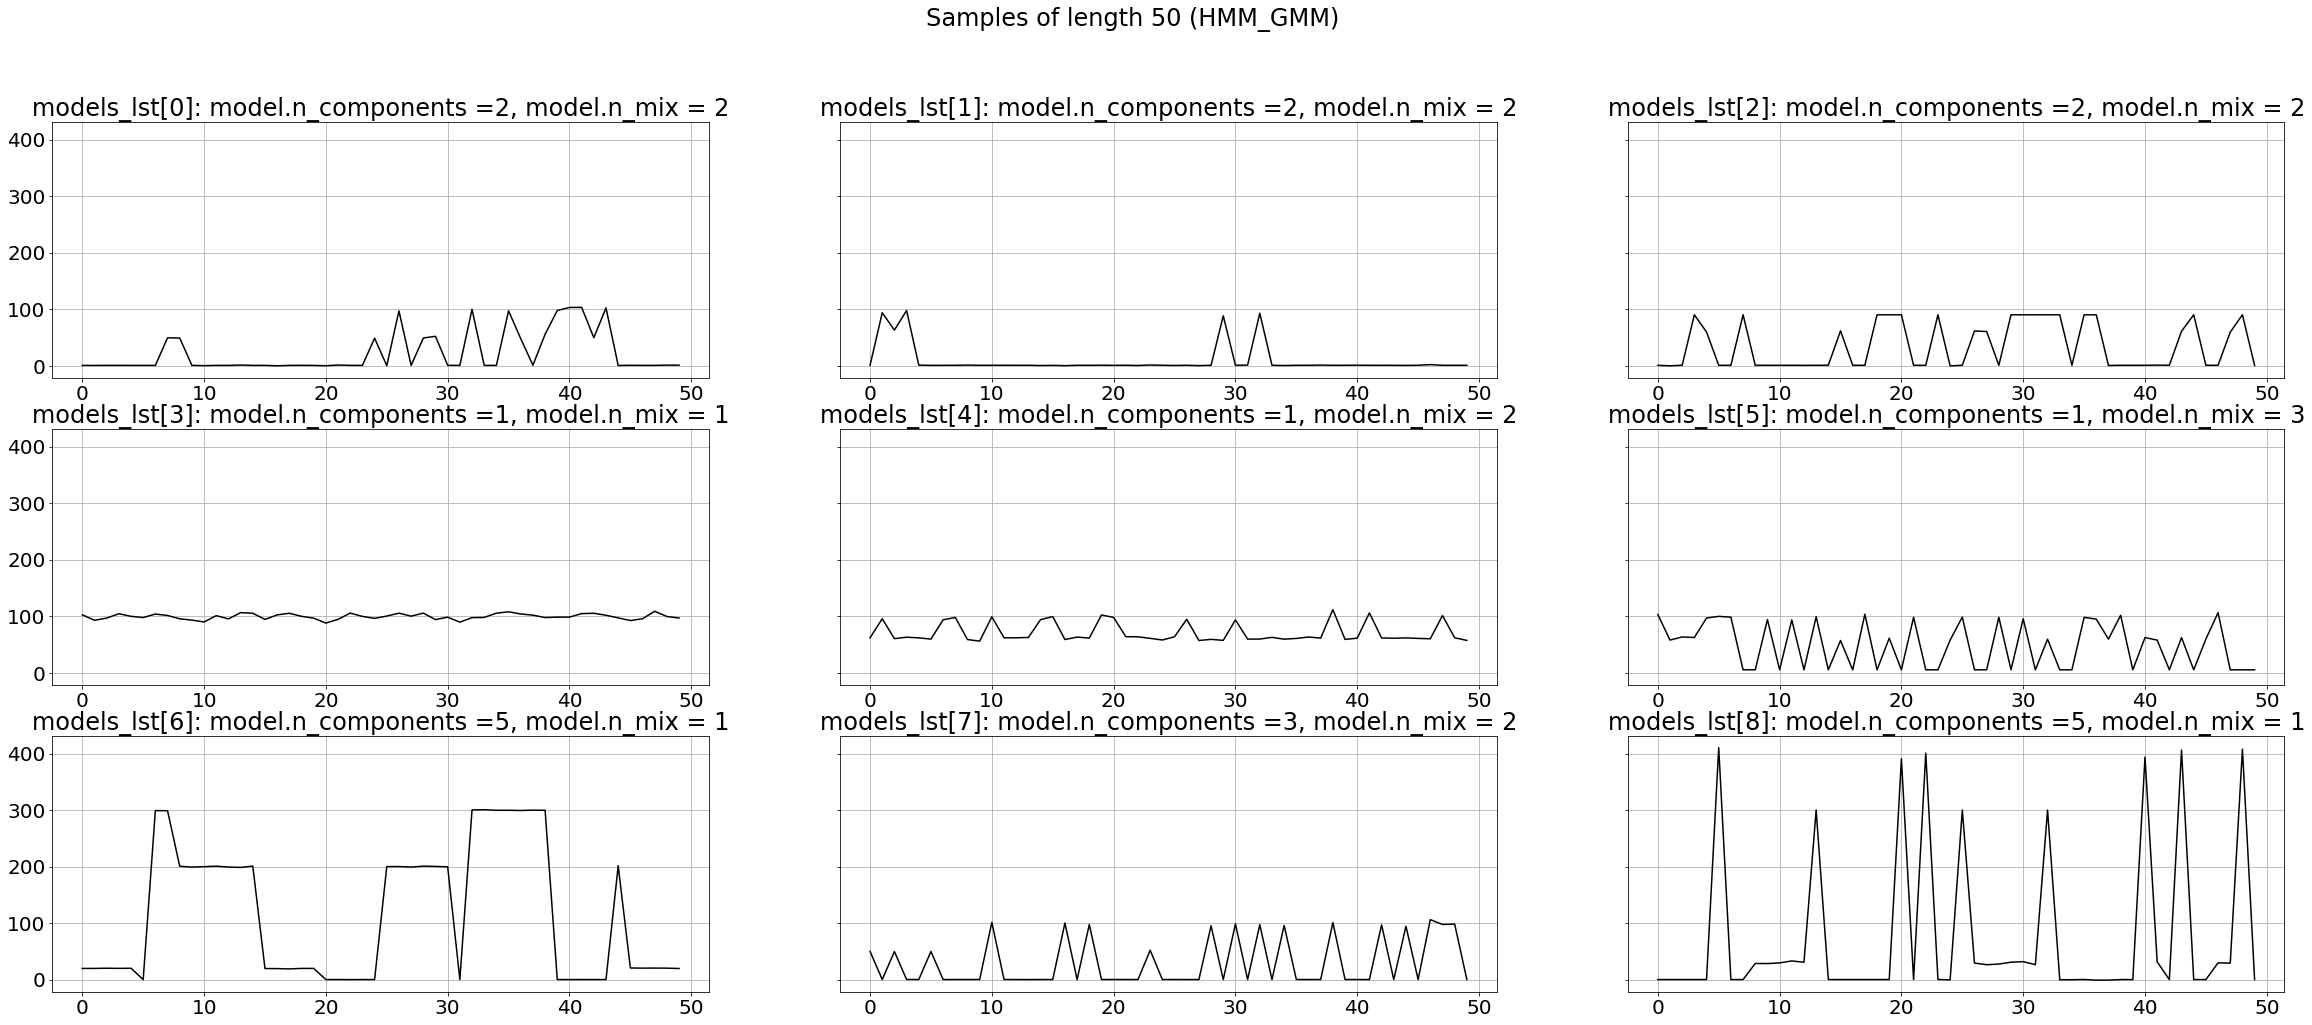

In [22]:
n = 50
plt.rcParams["figure.figsize"] = (40, 16)
plt.rcParams['font.size'] = 20
fig, axes = plt.subplots(3,3, sharey="all")
plt.suptitle(f"Samples of length {n} ({GENERATING_MODEL_NAME})")
for i, ax in enumerate(axes.reshape(-1)):
    model = models_lst[i]
    try:
        X,Z = model.sample(n)
    except Exception as e:
        print(f"Error in model {i}: {e}")
        continue
        
    # means = [model.means_[hidden_state] for hidden_state in Z]
    ax.plot(X, color = "black")
    # ax.scatter(np.array(range(len(Z))), means, color = "red", s = 15)
    ax.set_title(f"models_lst[{i}]: {model.n_components =}, {model.n_mix = }")
    ax.grid()
    
plt.savefig(f"./plots/models_{GENERATING_MODEL_NAME}_{time_index}.jpg")
plt.show()

In [23]:
model1.weights_.shape

(2, 2)

## Generate all data

In [24]:
def generate_data(models_lst: list[hmm.BaseHMM], samples_per_model: int, max_sample_len: int, min_sample_len: int) -> tuple:
    """Generate data from list of hmm.BaseHMM instances.
    Returns:
        - labels_df: pd.DataFrame | sample_id | true_label | sample_len
        - all_X_samples: a list with generated X samples
        - all_Z_samples: a list with generated hidden states
    """
    all_X_samples = []
    all_Z_samples = []
    true_labels = []
    sample_lengths = []
    sample_ids = list(range(samples_per_model*len(models_lst)))
    len_step = (max_sample_len-min_sample_len)//10
    possible_lenghts = range(min_sample_len, max_sample_len + 1, len_step)
    
    for i in range(len(models_lst)):
        model = models_lst[i]
        for j in range(samples_per_model):
            sample_len = np.random.choice(possible_lenghts)
            X,Z = model.sample(sample_len)
            all_X_samples.append(X)
            all_Z_samples.append(Z)
            sample_lengths.append(sample_len)
            true_labels.append(i)

    labels_df = pd.DataFrame({
        "sample_id": sample_ids,
        "true_label": true_labels,
        "sample_len": sample_lengths
    })

    return labels_df, all_X_samples, all_Z_samples

In [25]:
samples_per_model = N_TRAIN_SAMPLES_PER_MODEL + N_TEST_SAMPLES_PER_MODEL
labels_df, all_X_samples, all_Z_samples = generate_data(models_lst, samples_per_model, MAX_SAMPLE_LEN, MIN_SAMPLE_LEN)

## Prepare splits

In [26]:
train_samples_ids = []
test_samples_ids = []
for label, sub_df in labels_df.groupby("true_label"):
    train_ids = sub_df.sample(N_TRAIN_SAMPLES_PER_MODEL).index.values
    test_ids = sub_df.drop(train_ids).index.values
    if len(test_ids) != N_TEST_SAMPLES_PER_MODEL:
        raise Exception(f"len(test_ids) {len(test_ids)} != N_TEST_SAMPLES_PER_MODEL {N_TEST_SAMPLES_PER_MODEL}")
    train_samples_ids.extend(train_ids)
    test_samples_ids.extend(test_ids)
    

indices_split = {
    "train_samples_ids": train_samples_ids, 
    "test_samples_ids": test_samples_ids}

indices_splits_lst = [indices_split]
print(len(indices_split["train_samples_ids"]), len(indices_split["test_samples_ids"]))


45 900


## Save the data

In [27]:
data_filename = f"{FILENAME_SUFFIX}_{time_index}.pkl"
output_path = f"{DATA_DIR}/{data_filename}"

metadata = {
    "N_TRAIN_SAMPLES_PER_MODEL": N_TRAIN_SAMPLES_PER_MODEL,
    "N_TEST_SAMPLES_PER_MODEL": N_TEST_SAMPLES_PER_MODEL,
    "MAX_SAMPLE_LEN": MAX_SAMPLE_LEN,
    "MIN_SAMPLE_LEN": MIN_SAMPLE_LEN
}

data = {
    'generating_model': GENERATING_MODEL_NAME,
    'data_filename': data_filename,
    'time_index': time_index,
    'models_lst': models_lst,
    'labels_df': labels_df,
    'all_X_samples': all_X_samples,
    'all_Z_samples': all_Z_samples,
    'indices_splits_lst': indices_splits_lst,
    'metadata': metadata,
    'description': DESCRIPTION
}

with open(output_path, 'wb') as f:
    pickle.dump(data, f)
    print(f"Data saved to {output_path}.")

Data saved to ./generated_data_set2/HMM_GMM_data_ntrain5_min50_max150_1659090833.pkl.
